In [44]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
import requests

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [45]:
#Following instructions is not interesting :)
def get_revenue(ticker):
    headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36' } 
    url = "https://finance.yahoo.com/quote/" + ticker + "/financials?p=" + ticker 
    page = requests.get(url, headers = headers).text 
    soup = BeautifulSoup(page, "html.parser")
    table = pd.DataFrame(columns=["Breakdown", "TTM", "Year 1", "Year 2"])
    try:
        revenue_data = soup.find("div", attrs= {"D(tbr) fi-row Bgc($hoverBgColor):h"}).find_all("span")
        title = revenue_data[0].text
        ttm = revenue_data[1].text
        year1 = revenue_data[2].text
        year2 = revenue_data[3].text
        table = table.append({"Breakdown":title, "TTM": ttm, "Year 1": year1, "Year 2": year2}, ignore_index=True)
            
    except:
        print(ticker)
        print(f"{bcolors.FAIL}Warning: Yahoo Finance does not have revenue data for the stock{bcolors.ENDC}")
    
    table.set_index("Breakdown", inplace= True)
    
    return table

def get_timeseries(ticker, date = "max"):
    ticker = yf.Ticker(ticker)
    ticker_timeseries = ticker.history(period = date)
    ticker_timeseries.reset_index(inplace=True)
    ticker_timeseries.head()
    ticker_timeseries.set_index("Date", inplace= True)
    return ticker_timeseries

def plot_timeseries(timeseries, ticker):
    plot_x = plt.figure(figsize=(45,12))
    plot_x = plt.plot(timeseries['Close'], alpha=1)
    plot_x = plt.title(label= ticker, fontsize = 35)
    return plot_x

In [46]:
tickers = ["TSLA", "GME"]
revenue_dfs = []
timeseries_dfs = []
plots_dfs = []
for i in tickers:
    revenue_dfs.append(get_revenue(i))
    timeseries_dfs.append(get_timeseries(i))

C:\Users\User\AppData\Local\Temp\ipykernel_18320\1270877517.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({"Breakdown":title, "TTM": ttm, "Year 1": year1, "Year 2": year2}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18320\1270877517.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({"Breakdown":title, "TTM": ttm, "Year 1": year1, "Year 2": year2}, ignore_index=True)


In [47]:
tesla_data = timeseries_dfs[0]
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [48]:
# Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.
# I really do not get what revenue rows they are talking about 

tesla_revenue = revenue_dfs[0]

tesla_revenue

,TTM,Year 1,Year 2
Breakdown,,,
Total Revenue,"74,863,000","53,823,000","31,536,000"


In [49]:
gme_data = timeseries_dfs[1]
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [50]:
gme_revenue = revenue_dfs[1]

gme_revenue

,TTM,Year 1,Year 2
Breakdown,,,
Total Revenue,"5,954,700","6,010,700","5,089,800"


Text(0.5, 1.0, 'TSLA')

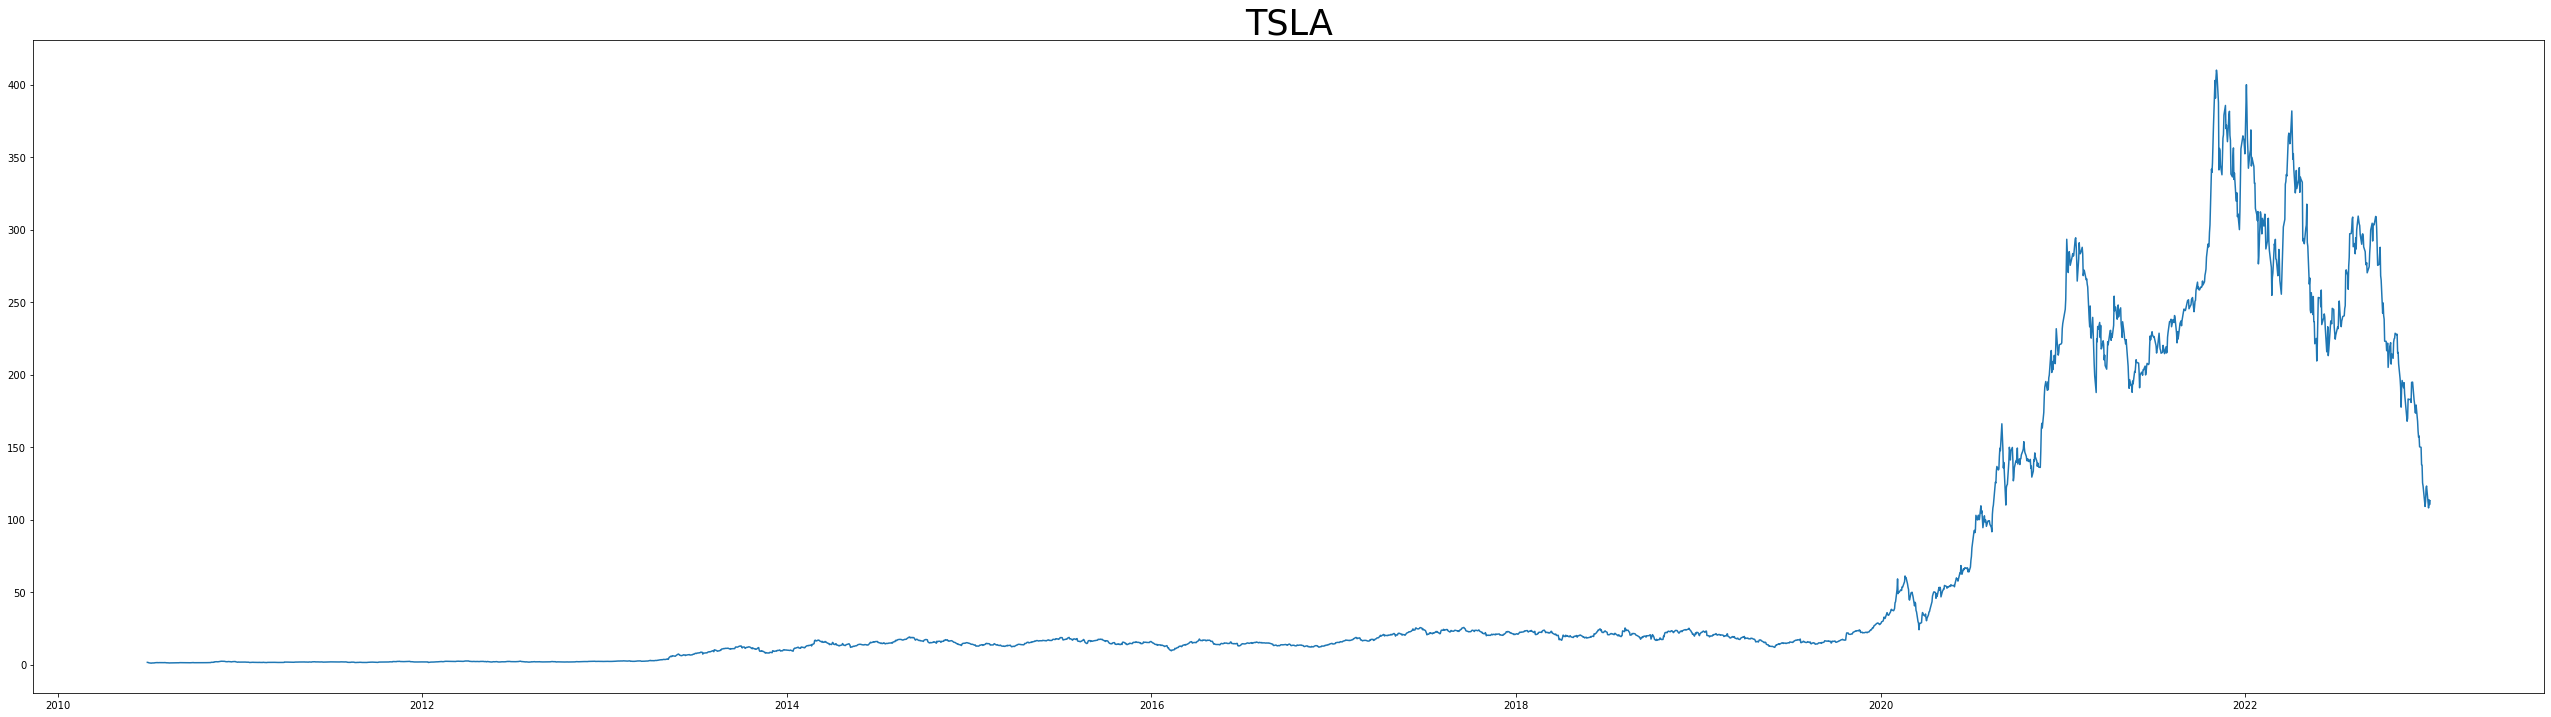

In [51]:
plot_timeseries(tesla_data, tickers[0])

Text(0.5, 1.0, 'GME')

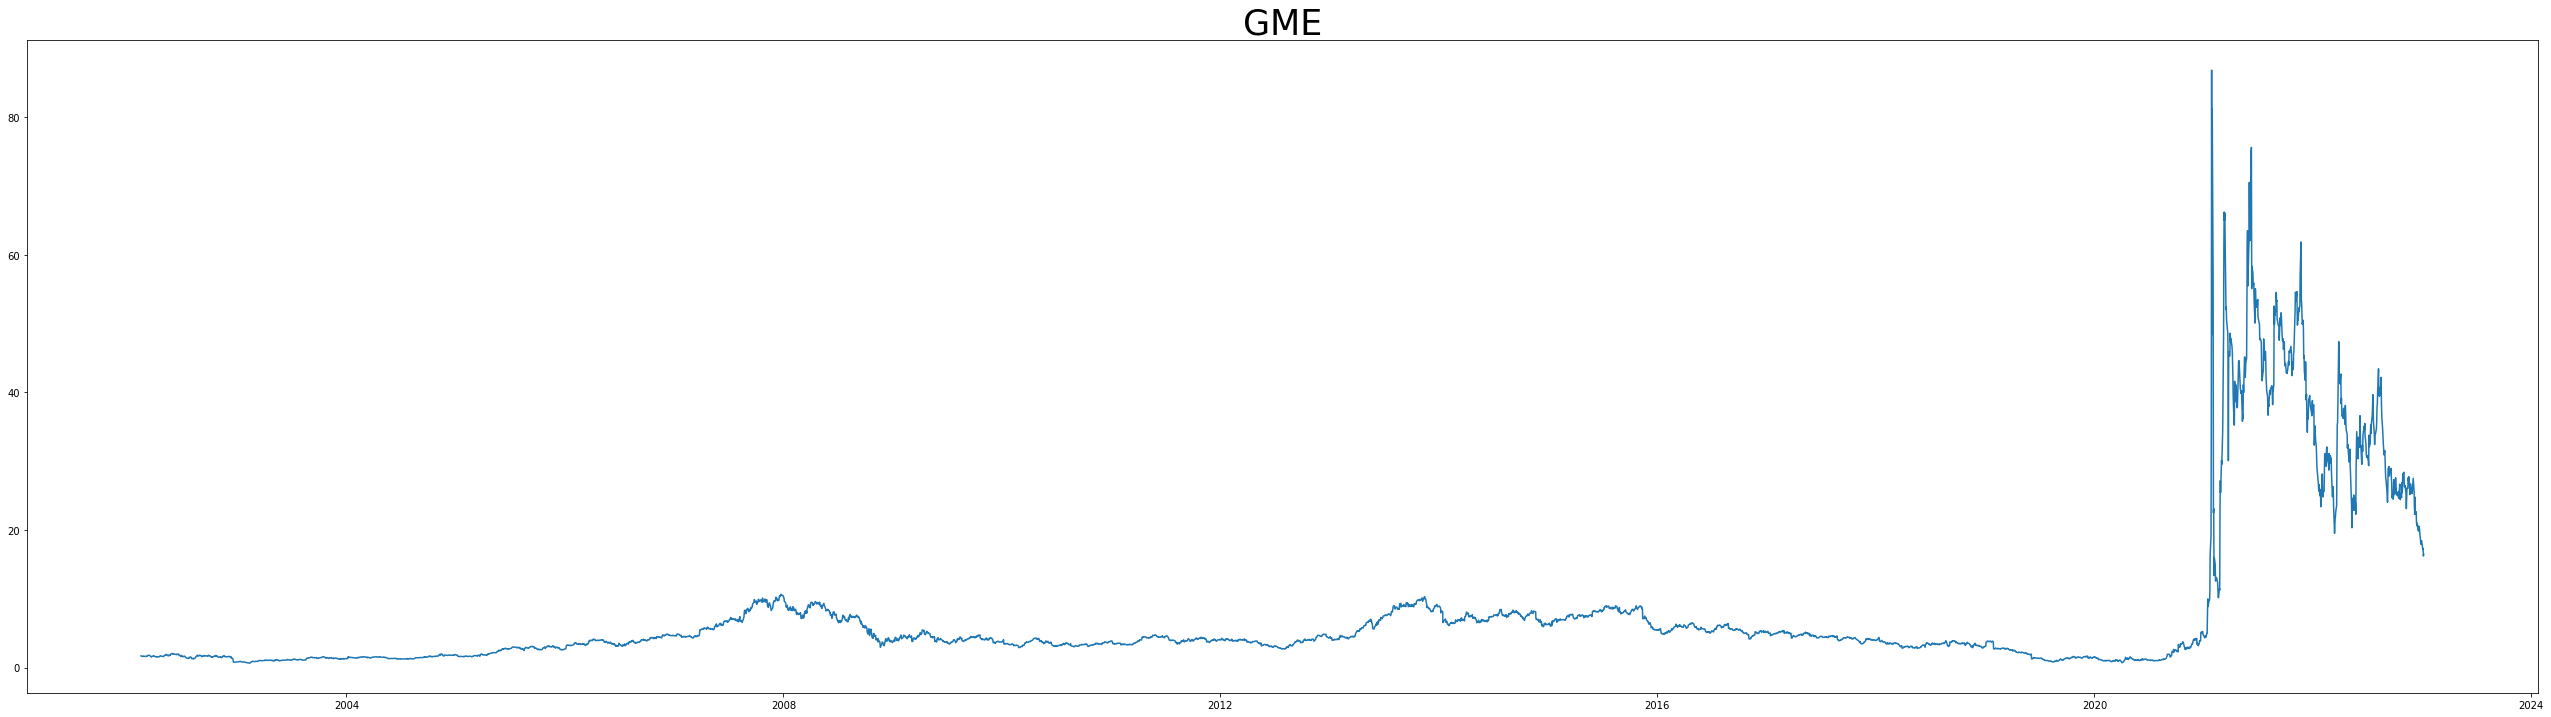

In [52]:
plot_timeseries(gme_data, tickers[1])